# Roster Age/Expererience Year over Year
- Create an adaptable book to plot team's proportions of each class rank (FR, SO, ect) from year to year for the past 10-20 years
- Using a stacked bar chart will make for a nice look I thin

In [85]:
## Depen# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import seaborn as sns
import sqlite3


## Hotfix TURNED OFF - replace master_roster table in dB with corrected roster table from csv

In [86]:
# # Load Corrected Roster Data
# roster_path = os.path.join('..', 'data', 'rosters', 'master_roster.csv')

# # load as DF
# corrected_roster = pd.read_csv(roster_path)

# # Check
# corrected_roster.head()

In [87]:

# #### EXTRACT FROM DATABASE
# # Connect to the database
# db_path = os.path.join('..', 'TEMP', 'roster_cleaned.db')
# conn = sqlite3.connect(db_path)

# # Query the database
# roster = pd.read_sql_query("SELECT * FROM master_roster", conn)

# # roster.head()


In [88]:
# # replace the master_roster db table with the corrected_roster
# corrected_roster.to_sql('master_roster', conn, if_exists='replace', index=False)


In [89]:
breakpoint()

## Load Roster Data

In [90]:

# Load DATABASE

#### EXTRACT FROM DATABASE
# Connect to the database
db_path = os.path.join('..', 'data', 'db', 'Cleaned_DB_Ap_7.db')
conn = sqlite3.connect(db_path)

# Query the database
roster = pd.read_sql_query("SELECT * FROM master_roster", conn)


# Check the table
roster.head()

# TEMP
############################################
# Drop last 3 columns
# roster = roster.iloc[:, :-3]
# Drop file and Ht
roster = roster.drop(columns=['file', 'Ht'])
#################################################

# Replace - with ' ' in team column
roster['Team'] = roster['Team'].str.replace('-', ' ')
# Draft_Year, D_Round, Wt, Season to int if needed
int_col = ['Draft_Year', 'D_Round', 'Wt', 'Season']
roster[int_col] = roster[int_col].fillna(0) # Fill nulls
roster[int_col] = roster[int_col].astype(int) # convert to int
#############################################
# Drop any duplicate rows
# Print length before
print(f'Length before dropping duplicates: {len(roster)}')
roster = roster.drop_duplicates()
# Print length after
print(f'Length after dropping duplicates: {len(roster)}')

roster.head() # Check table

#####################################################
# ### OPEN THE ROSTER FROM A CSV FILE
# roster_path = os.path.join('..', 'data', 'rosters', 'all_time_combined_roster.csv')

# # Check if the file exists
# if os.path.exists(roster_path):
#     # Read the csv file
#     roster = pd.read_csv(roster_path)
# else:
#     print('Roster filepath does not exist')
#     sys.exit(1)


### QUICK CLEANING
#### Check the column name and rename if necessary
## If Clean_Name exists rename it to Player
# if 'Clean_Name' in roster.columns:
#     roster = roster.rename(columns={'Clean_Name': 'Player'})

# # Season = int
# roster['Season'] = roster['Season'].astype(int)


# # drop the file column seems to be a mistake
# if 'file' in roster.columns:
#     roster = roster.drop(columns=['file'])
    
# # Check and drop duplicate rows
# roster = roster.drop_duplicates()

Length before dropping duplicates: 78557
Length after dropping duplicates: 78557


,Team,Clean_Name,No,Position,Yr,Wt,DOB,Hometown,Height_Inches,Draft_Year,NHL_Team,D_Round,Last Team,League,Season,captain
0,Harvard,Proctor Carr,0,Defensemen,None,152,None,"Andover, N.H.",61,0,None,0,None,None,1902,None
1,Harvard,William Clothier,0,Defensemen,None,0,9/27/1881,"Sharon Hill, Pa.",0,0,None,0,None,None,1902,None
2,Harvard,Joseph Lovering,0,Defensemen,None,0,1/7/1882,"Boston, Mass.",0,0,None,0,None,None,1902,None
3,Harvard,Daniel Newhall,0,Defensemen,Fr,0,12/3/1884,"Philadelphia, Pa.",0,0,None,0,None,None,1902,None
4,Harvard,John Manning,0,Goaltenders,Jr,0,6/3/1879,"Boston, Mass.",0,0,None,0,None,None,1902,None


## Setup and Plot Parameters

In [91]:


## Load The Exo 2 font in case of problems with the font
font_path = 'C:/Windows/Fonts/Exo 2.tff'
# plt.rcParams['font.family'] = 'Exo 2'




## Set Filter 


In [92]:
########################
### SET FILTERS 
## YEARS
start_year = 1990
end_year = 2024
#####################


### Range of Years

In [93]:

# Filter the dataset to the years of interest
roster = roster[(roster['Season'] >= start_year) 
                & (roster['Season'] <= end_year)]




print(f'{len(roster["Team"].unique()) } unique teams in the dataset')

# Average players per team each season
pp_team = len(roster) / len(roster['Team'].unique())
# Find average per year
range = end_year - start_year
pp_team_year = pp_team / range
print(f'Average players per team each season: {pp_team_year}\n\n\n')

### Cache roster of all teams for the given time period
roster_by_year = roster.copy()

# # roster Info
# roster.info()

# roster.head()

################# VIZULIZE THE DATA
# # Histogram of player count per team and year
# plt.figure(figsize=(12, 6))
# sns.histplot(data=roster, x='Team', hue='Season', multiple='stack', palette='viridis')
##############################################

# Team value counts
team_counts = roster['Team'].value_counts()
# team_counts

# # Plot the team counts
# plt.figure(figsize=(12, 6))
# sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')

71 unique teams in the dataset
Average players per team each season: 18.846727423363713





C:\Users\jbanc\AppData\Local\Temp\ipykernel_5920\473325460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')


<Axes: xlabel='Team'>

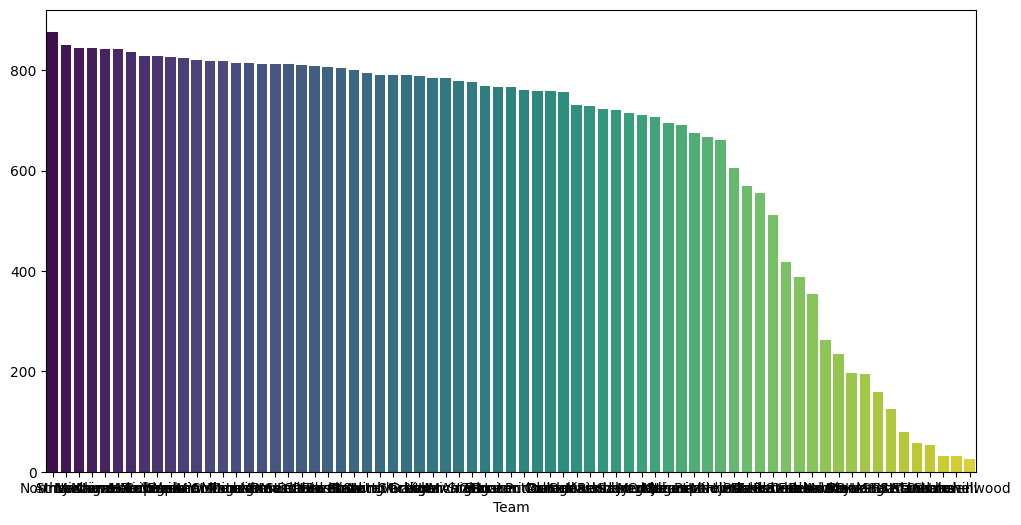

### TEAM OR LIST OF TEAMS

In [94]:
#### SET TEAM OR GROUP OF TEAMS
team = 'Michigan State'
# Filter the dataset to the team of interest
team_roster = roster[roster['Team'] == team]

# How many NHL Draft Picks has season team had 
# group by Season and Count the number of players where Draft_Year is not 0
team_roster.groupby('Season')['Draft_Year'].apply(lambda x: (x != 0).sum())

# sort accending by season
team_roster.groupby('Season')['Draft_Year'].apply(lambda x: (x != 0).sum()).sort_index()
# team_roster['Draft_Year'].value_counts().sort_index()



Season
1990    0
1991    0
1992    0
1993    0
1994    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2003    4
2004    5
2005    9
2006    7
2007    8
2008    7
2009    7
2010    4
2011    3
2013    5
2014    6
2015    5
2016    2
2018    3
2019    4
2020    5
2021    5
2022    3
2023    5
Name: Draft_Year, dtype: int64

## Break down each roster by age and class rank

In [95]:
## claculate the average age to start the season October 1st of Season
# Convert the DOB to datetime
# team_roster['DOB'] = pd.to_datetime(team_roster['DOB'])
# # Calculate the age, store as float of years
# team_roster['Age'] = (pd.to_datetime(f'{team_roster["Season"].max()}-10-1') - team_roster['DOB']).dt.days / 365.25

team_roster.tail()
# Calculate the average age


,Team,Clean_Name,No,Position,Yr,Wt,DOB,Hometown,Height_Inches,Draft_Year,NHL_Team,D_Round,Last Team,League,Season,captain
77997,Michigan State,Red Savage,21,Forwards,Jr,185,5/15/2003,"Scottsdale, Ariz.",71,2021,DET,4,Miami,NCHC,2023,None
77998,Michigan State,Tiernan Shoudy,13,Forwards,So,180,3/15/2002,"Marysville, Mich.",69,0,None,0,Youngstown,USHL,2023,None
77999,Michigan State,Trey Augustine,1,Goaltenders,Fr,179,2/23/2005,"South Lyon, Mich.",73,2023,DET,2,USNTDP,None,2023,None
78000,Michigan State,Luca Di Pasquo,31,Goaltenders,Fr,201,9/24/2003,"Livonia, Mich.",72,0,None,0,Penticton,BCHL,2023,None
78001,Michigan State,Jon Mor,30,Goaltenders,Sr,200,7/20/2000,"Highland Park, Ill.",74,0,None,0,Langley,BCHL,2023,None
